# Assignment 10 (10 Points): Scikit-Learn

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

### Q1 (5 points): Use PCA to project the 64 dimensional digits dataset to 2 dimensions. Then, use the leave-one-out cross validation algorithm and Gaussian Naive Bayes to compare the classification scores (i.e., classification accuracies) of the 2 dimensional version of the data versus the original 64 dimensional version.

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [5]:
pca = PCA(2)  # project from 64 to 2 dimensions
X_proj = pca.fit_transform(X)

In [6]:
print(X.shape)
print(X_proj.shape)

(1797, 64)
(1797, 2)


In [7]:
loo = LeaveOneOut()  #applying Leave-one-out
loo.get_n_splits(X)
model = GaussianNB() #applying Gaussian Naive Bayes
scores = cross_val_score(model, X, y, cv = loo)

In [8]:
scores.mean()

0.8408458542014469

In [9]:
loo = LeaveOneOut()   #applying Leave-one-out
loo.get_n_splits(X_proj)
model = GaussianNB()  #applying Gaussian Naive Bayes
scores_proj = cross_val_score(model, X_proj, y, cv=loo)

In [10]:
scores_proj.mean()

0.6516416249304396

### Q2 (5 points): Use the K-Means algorithm to form 10 clusters of the 2 dimensional projected data from Q1.

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(X_proj)
y_kmeans = kmeans.predict(X_proj)

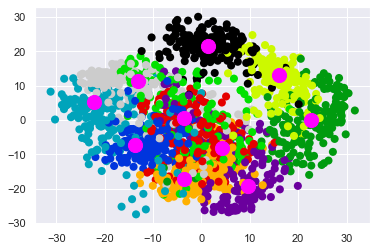

In [12]:
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c = digits.target, s = 65, edgecolor = 'none',
            cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 0, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'fuchsia', s = 200);